<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Jose Leonardo Aceves González y Tania Bell Nicholls

**Fecha:** 21 de octubre del 2021.

**Expediente** : 712626 y IF726767.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/leonardoaceves/Tarea8_JLACEVES_TNICHOLLS.git

# Tarea 7: Clase 13

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:

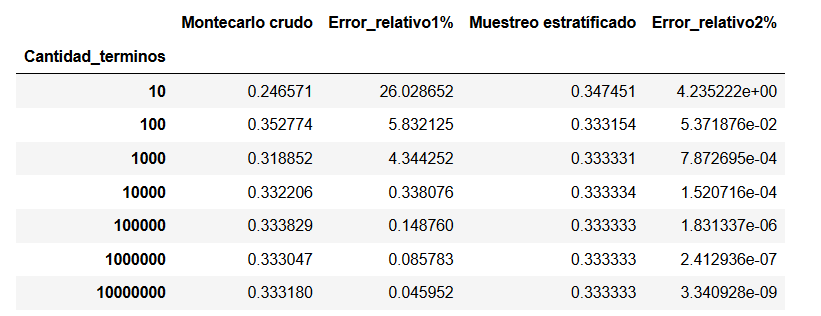


Código de solución Leonardo A.

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución Tania

In [7]:
# Código de solución estudiante 2

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

def funcion(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

def muestreo_estratificado(B):
    a = 0
    b = 1
    f = lambda x: x**2
    def m(B):
        nonlocal a, b
        global U
        U = np.random.uniform(a,b,B)
        muestra = st.uniform.ppf((U + np.arange(0,B)) / B)
        return muestra
    muestras = [m(i) for i in B]
    estratificados = [funcion(f,a,b,i) for i in muestras]    
    return estratificados

B = np.logspace(1,7,7,dtype=int)
est = muestreo_estratificado(B)

I = 1/3

a = 0; b = 1

N = np.logspace(1,7,7,dtype=int)

ui = list(map(lambda N:np.random.uniform(a,b,N),N))

I_m = list(map(lambda Y:funcion(lambda x:x**2,a,b,Y),ui))

est, I_m

([0.3234094695664944,
  0.33372460420147976,
  0.3333412855885236,
  0.3333329033139783,
  0.3333333257968531,
  0.33333333353327194,
  0.3333333333221061],
 [0.2747828654317242,
  0.34170083588031314,
  0.343809119201116,
  0.33177855119526867,
  0.3346286941986883,
  0.33308351091825816,
  0.33323546766785306])

Código de solución Leonardo A.

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución Tania

In [8]:
# Código de solución estudiante 2

df = pd.DataFrame(index=N,columns=['Montecarlo Crudo', 'Error_relativo1%','Muestreo Estratificado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,"Montecarlo Crudo"] = I_m
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo Crudo"]-I)*100/I
df.loc[N,"Muestreo Estratificado"] = est
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[B,"Muestreo Estratificado"]-I)*100/I
df


,Montecarlo Crudo,Error_relativo1%,Muestreo Estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.274783,17.565140,0.323409,2.977159e+00
100,0.341701,2.510251,0.333725,1.173813e-01
1000,0.343809,3.142736,0.333341,2.385677e-03
10000,0.331779,0.466435,0.333333,1.290058e-04
100000,0.334629,0.388608,0.333333,2.260944e-06
1000000,0.333084,0.074947,0.333333,5.998159e-08
10000000,0.333235,0.029360,0.333333,3.368172e-09
